In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model 
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model


In [3]:
#Get the Dataset
df=pd.read_csv("BACstock.csv",na_values=['null'],parse_dates=True,infer_datetime_format=True)
df.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,11.86,11.90,11.72,11.760,145217221,BAC
1,2/11/2013,11.73,11.90,11.67,11.860,103499848,BAC
2,2/12/2013,11.87,12.34,11.78,12.245,231771561,BAC
3,2/13/2013,12.35,12.42,12.05,12.170,192478919,BAC
4,2/14/2013,12.09,12.27,12.07,12.130,143901737,BAC


In [5]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1259, 7)
Null Value Present:  False


<AxesSubplot:>

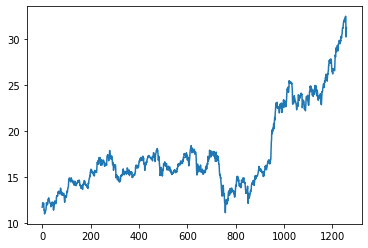

In [6]:
#Plot the True Adj Close Value
df["close"].plot()

In [7]:
#Set Target Variable
testdf = df["close"]
testdf


0       11.760
1       11.860
2       12.245
3       12.170
4       12.130
         ...  
1254    32.500
1255    31.950
1256    30.260
1257    31.200
1258    31.250
Name: close, Length: 1259, dtype: float64

In [8]:
#Selecting the Features
traindf = df.drop(columns=['close','Name','date'])
traindf

,open,high,low,volume
0,11.86,11.90,11.72,145217221
1,11.73,11.90,11.67,103499848
2,11.87,12.34,11.78,231771561
3,12.35,12.42,12.05,192478919
4,12.09,12.27,12.07,143901737
...,...,...,...,...
1254,32.00,32.50,31.96,62367448
1255,32.44,32.67,31.86,96971924
1256,31.12,31.98,29.15,155908256
1257,29.41,31.29,29.30,165878399


In [11]:
#Scaling
# scaler = MinMaxScaler()
# feature_transform = scaler.fit_transform(testdf)
# feature_transform = pd.DataFrame(columns='close', data=traindf, index=df.index)
# feature_transform.head()

In [53]:
X = traindf
y = testdf

In [54]:
X

,open,high,low,volume
0,11.86,11.90,11.72,145217221
1,11.73,11.90,11.67,103499848
2,11.87,12.34,11.78,231771561
3,12.35,12.42,12.05,192478919
4,12.09,12.27,12.07,143901737
...,...,...,...,...
1254,32.00,32.50,31.96,62367448
1255,32.44,32.67,31.86,96971924
1256,31.12,31.98,29.15,155908256
1257,29.41,31.29,29.30,165878399


In [55]:
y

0       11.760
1       11.860
2       12.245
3       12.170
4       12.130
         ...  
1254    32.500
1255    31.950
1256    30.260
1257    31.200
1258    31.250
Name: close, Length: 1259, dtype: float64

In [56]:
# apply LinearRegression this is the code for the machine learning algorithm
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier


LogisticRegression()

In [57]:
# Train the Logistic Regression model on the unscaled data and print the model score
# this is what the machine algotirhtm will train and validate the data it learned.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
# Converting output labels to 0 and 1; assign the 0 or 1 into the definition of Low risk (1) or high risk (0)
# this step returns only 1 column, this case 

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)



In [59]:
#view transformed values
print(y_transformed)

[ 13  16  38 ... 708 715 717]


In [60]:
classifier.fit(X, y_transformed)

LogisticRegression()

In [61]:
# Scale the data: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs", random_state=19)
classifier


LogisticRegression(random_state=19)

In [64]:
y_transformed

array([ 13,  16,  38, ..., 708, 715, 717], dtype=int64)

In [66]:
X_train_scaled

array([[-0.58978927, -0.61286266, -0.61811702, -0.13992504],
       [-0.67048767, -0.67042559, -0.64442817, -0.93175679],
       [ 1.86387809,  1.90116664,  1.89898292, -0.87233277],
       ...,
       [ 1.28808415,  1.25772696,  1.2894413 , -0.79949617],
       [-0.09251269, -0.08548044, -0.08312365,  5.39150351],
       [ 1.36223943,  1.3238041 ,  1.30917466, -0.29290139]])

In [67]:
#Train our model
classifier.fit(X_train_scaled, y_transformed)


ValueError: Found input variables with inconsistent numbers of samples: [944, 1259]

In [ ]:
# see the score of LinearRegression model: 
classifier.score(X_test_scaled, y_transformed)

In [68]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

from keras.utils.vis_utils import plot_model

In [69]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(traindf):
        X_train, X_test = traindf[:len(train_index)], traindf[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = testdf[:len(train_index)].values.ravel(), testdf[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [70]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [71]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [72]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 1s 1ms/step - loss: 99353526272.0000
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 181207.7031
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 93.2901
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 122.8280
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 121.6304
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 117.8500
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 100.8582
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 91.9173
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 85.9545
Epoch 10/100
144/144 [==============================] - 0s 1ms/step - loss: 80.5925
Epoch 11/100
144/144 [==============================] - 0s 1ms/step - loss: 81.4429
Epoch 12/100
144/144 [==============================] - 0s 1ms/step 

In [74]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

array([[15.769247],
       [14.237997],
       [20.144247],
       [19.581747],
       [20.519247],
       [19.206747],
       [32.644245],
       [21.019247],
       [30.894247],
       [21.956747],
       [23.831747],
       [30.144247],
       [27.081747],
       [22.831747],
       [27.019247],
       [22.269247],
       [19.206747],
       [26.081747],
       [19.706747],
       [20.769247],
       [20.519247],
       [18.394247],
       [28.456747],
       [21.706747],
       [21.956747],
       [18.706747],
       [19.581747],
       [19.019247],
       [20.956747],
       [19.081747],
       [19.269247],
       [16.862997],
       [18.519247],
       [23.519247],
       [31.769247],
       [23.331747],
       [17.706747],
       [19.456747],
       [19.081747],
       [26.769247],
       [23.144247],
       [28.581747],
       [24.581747],
       [19.706747],
       [20.644247],
       [18.394247],
       [18.206747],
       [17.144247],
       [20.581747],
       [15.081747],


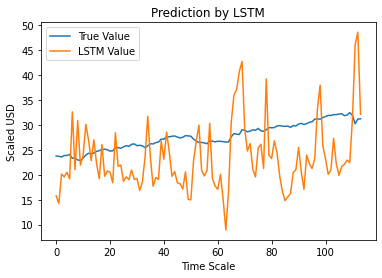

In [83]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [75]:
y_test

array([23.77 , 23.72 , 23.58 , 23.87 , 23.89 , 24.09 , 23.31 , 23.41 ,
       22.97 , 22.89 , 23.36 , 23.95 , 24.33 , 24.24 , 24.38 , 24.7  ,
       24.86 , 25.06 , 25.16 , 25.02 , 24.76 , 24.81 , 25.41 , 25.45 ,
       25.34 , 25.62 , 25.86 , 25.71 , 26.13 , 26.21 , 25.85 , 25.93 ,
       25.83 , 25.45 , 25.83 , 26.24 , 26.2  , 26.48 , 26.58 , 27.17 ,
       27.16 , 27.68 , 27.635, 27.74 , 27.8  , 27.6  , 27.39 , 27.53 ,
       27.87 , 27.82 , 27.75 , 27.18 , 26.79 , 26.49 , 26.51 , 26.4  ,
       26.24 , 26.79 , 26.76 , 26.62 , 26.74 , 26.73 , 26.66 , 26.59 ,
       26.59 , 27.64 , 28.28 , 28.17 , 28.1  , 29.06 , 28.93 , 28.64 ,
       28.78 , 29.05 , 28.94 , 29.32 , 28.84 , 28.73 , 29.04 , 29.48 ,
       29.45 , 29.48 , 29.82 , 29.88 , 29.78 , 29.73 , 29.8  , 29.52 ,
       29.9  , 29.8  , 30.19 , 30.33 , 30.12 , 30.27 , 30.55 , 30.66 ,
       31.19 , 31.24 , 31.18 , 31.48 , 31.72 , 31.94 , 31.92 , 32.09 ,
       32.09 , 32.2  , 32.28 , 31.88 , 32.   , 32.5  , 31.95 , 30.26 ,
      

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
# LSTMacc = round((accuracy_score(y_test,y_pred)*100),2)
# print(LSTMacc)

ValueError: continuous is not supported